Predictions: [147.425 182.297 180.312 141.198 276.607 193.638 186.59  147.723 145.754
 204.949 168.005 189.204 212.928 162.981 146.999 178.17  175.042 190.692
 275.934 213.511 205.726 179.486 167.318 229.511 267.251 195.993 194.404
 193.976 243.557 174.496 132.62  185.493 157.695 158.467 218.435 178.988
 219.745 228.262 166.115 201.866 167.384 246.599 200.504 200.753 212.542
 202.206 188.396 190.444 197.733 216.97  175.138 187.649 151.642 249.675
 127.299 184.614 217.647 215.126 212.225 167.501]
Interception: 33.5
Coefficient: [ 0.089 12.031 -0.476 -0.591 10.564]
Actual: [np.float64(106.9), np.float64(183.95), np.float64(149.01), np.float64(146.18), np.float64(238.18), np.float64(230.57), np.float64(175.08), np.float64(174.13), np.float64(131.26), np.float64(201.03), np.float64(164.78), np.float64(182.87), np.float64(209.45), np.float64(182.58), np.float64(169.6), np.float64(136.63), np.float64(179.25), np.float64(196.7), np.float64(277.27), np.float64(193.11), np.float64(263.54), np.f

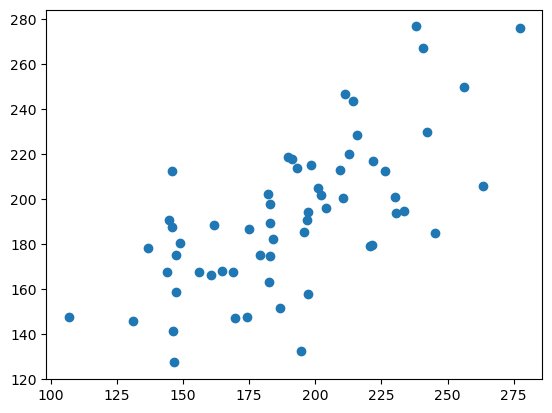

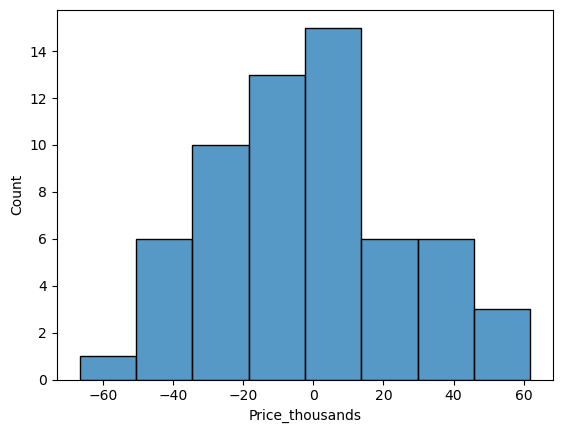

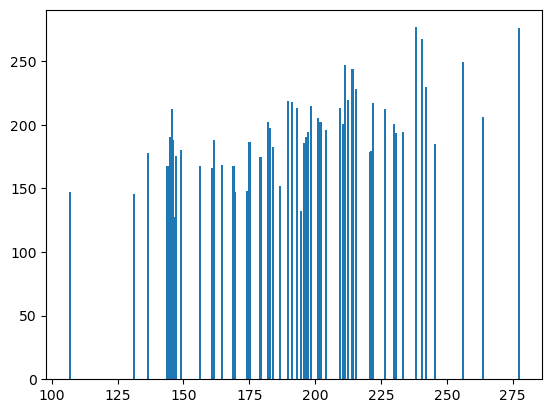

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

data=pd.read_excel("lr.xlsx")
df=pd.DataFrame(data)

X=df[["Size_sqft"	,"Bedrooms",	"Age",	"Distance_to_city_km",	"Has_garage"]]
y=df["Price_thousands"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

model=LinearRegression()
model.fit(X_train,y_train)

predictions=model.predict(X_test)
residuals=y_test-predictions

mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
rmse=np.sqrt(mse)
r2=r2_score(y_test,predictions)
n=len(y_test)
p=X_test.shape[1]
adj_r2=1-(1-r2)*(n-1)/(n-p-1)
actual=y_test,predictions


print("Predictions:",np.round(predictions,3))
print("Interception:",np.round(model.intercept_,3))
print("Coefficient:",np.round(model.coef_,3))
print("Actual:",list(y_test.values))
print("rmse:",round(rmse,3))
print("r2",round(r2,3))
print("Residuals:",residuals)
print("Actual vs Predictions",error)


plt.scatter(y_test,predictions)
plt.show()
sns.histplot(residuals)
plt.show()

plt.bar(y_test,predictions)
plt.show()



In [7]:
print(round(147381.998+100.88*1400  + 9408.231*3+ -5702.76*10))

259811


accuracy 0.6764166666666667
report               precision    recall  f1-score   support

           0       0.63      0.54      0.58      5013
           1       0.70      0.77      0.74      6987

    accuracy                           0.68     12000
   macro avg       0.67      0.66      0.66     12000
weighted avg       0.67      0.68      0.67     12000

confusion matrix [[2707 2306]
 [1577 5410]]


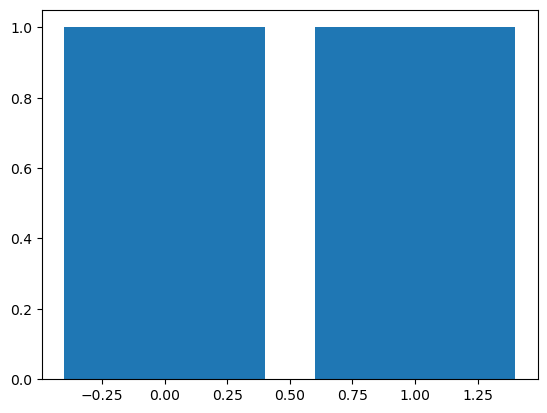

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

data=pd.read_excel("jjj.xlsx")
df=pd.DataFrame(data)

X=df[["CURR_AGE","AGE","INCOME","CAR"]]
y=df['PURCHASE']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


model=LogisticRegression()
model.fit(X_train,y_train)


pred=model.predict(X_test)
accuracy=accuracy_score(y_test,pred)
clas=classification_report(y_test,pred)
con=confusion_matrix(y_test,pred)

print("accuracy",accuracy)
print("report",clas)
print("confusion matrix",con)







accuracy 1.0
report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

confusion matrix [[2 0]
 [0 3]]


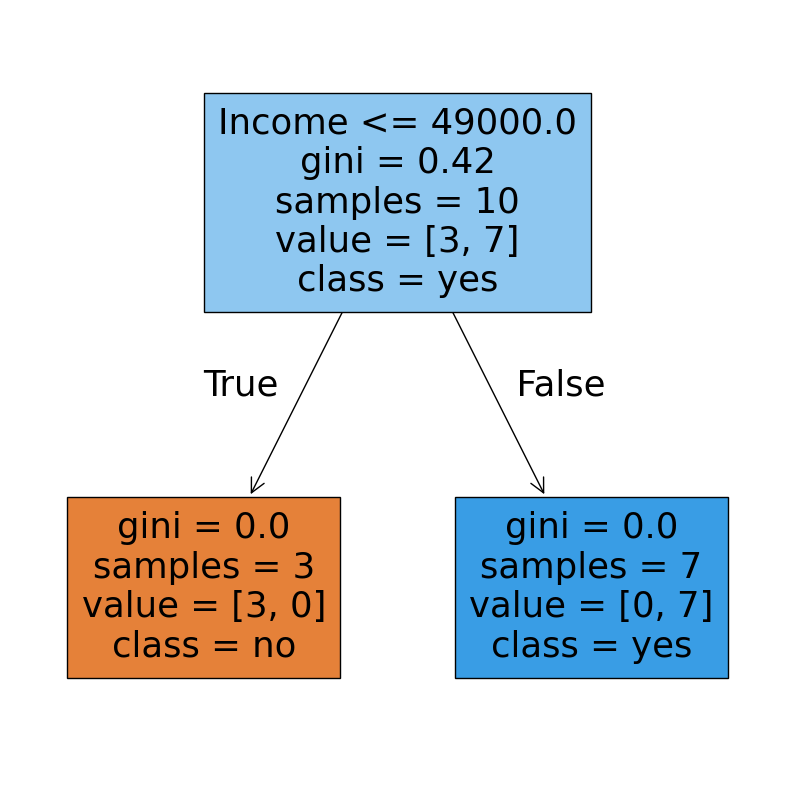

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

data=pd.read_excel("decision.xlsx")
df=pd.DataFrame(data)
df['CreditScore']=df['CreditScore'].map({"low":0,"medium":1,"high":2})
df['Approved']=df['Approved'].map({"yes":1,"no":0})
X=df.drop("Approved",axis=1)
y=df["Approved"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

model=DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=42)
model.fit(X_train,y_train)

predictions=model.predict(X_test)
acc=accuracy_score(y_test,predictions)
classification=classification_report(y_test,predictions)
confusion=confusion_matrix(y_test,predictions)

print("accuracy",acc)
print("report",classification)
print("confusion matrix",confusion)

plt.figure(figsize=(10,10))
plot_tree(model,feature_names=X.columns,class_names=["no","yes"],filled=True)
plt.show()